# **Predict Clicked Ads Customer Classification by using Machine Learning**

In [91]:
!pip install -U ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13201 sha256=8323db28e9196937f73a9b7d98c618b39cb05566f71d37776e58828bc777d6d0
  Stored in directory: c:\users\nivan dumatubun\appdata\local\pip\cache\wheels\7e\45\08\bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")

## **Load Dataset**

In [3]:
df = pd.read_csv('ads_dataset.csv')
pd.set_option('display.max_columns',None)

In [4]:
df.sample(2)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
8,8,74.53,30,482034000.0,221.51,Laki-Laki,4/18/2016 9:33,No,Batam,Kepulauan Riau,Bank
878,878,81.75,43,367645250.0,249.45,Perempuan,6/7/2016 5:41,No,Pakanbaru,Riau,Electronic


In [5]:
df.shape

(1000, 11)

In [6]:
df.rename(columns={'Male' : 'Gender'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Gender                    997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


## **Dataset Overview**

| Feature                   | Description                                             |
|---------------------------|---------------------------------------------------------|
| Daily Time Spent on Site  | Waktu yang dihabiskan dalam situs setiap hari (menit)   |
| Age                       | Usia pengguna                                           |
| Area Income               | Pendapatan area pengguna dalam dolar                    |
| Daily Internet Usage      | Waktu yang dihabiskan di internet setiap hari (menit)   |
| Gender                    | Jenis kelamin pengguna (Male/Female)                    |
| Timestamp                 | Stempel waktu interaksi pengguna dengan situs web       |
| Clicked on Ad             | Apakah pengguna mengklik iklan (Ya/Tidak)               |
| city                      | Kota pengguna                                           |
| province                  | Provinsi pengguna                                       |
| category                  | Kategori pengguna (e.g., customer segment)              |


In [8]:
df1 = df.copy()

# 1. Exploratory Data Analysis

In [9]:
num = ['Daily Time Spent on Site','Age','Daily Internet Usage']

cat = ['Gender','Clicked on Ad','city','province','category']

In [10]:
df1[num].describe()

,Daily Time Spent on Site,Age,Daily Internet Usage
count,987.000000,1000.000000,989.000000
mean,64.929524,36.009000,179.863620
std,15.844699,8.785562,43.870142
min,32.600000,19.000000,104.780000
25%,51.270000,29.000000,138.710000
50%,68.110000,35.000000,182.650000
75%,78.460000,42.000000,218.790000
max,91.430000,61.000000,267.010000


## 1.1 Univariate Analysis

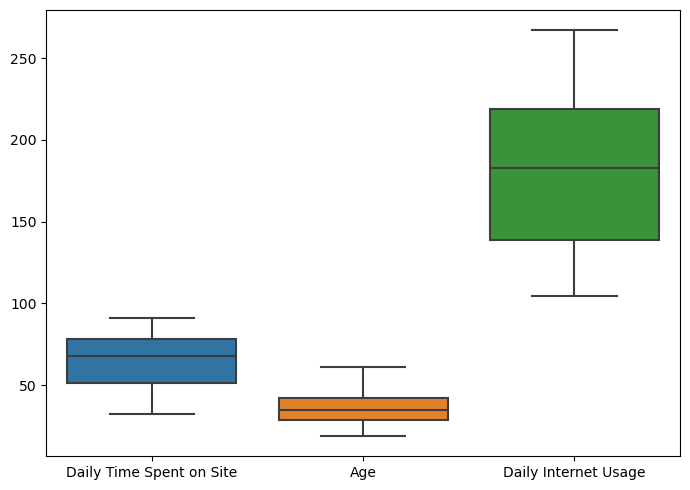

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df1[num])
plt.tight_layout()
plt.show()

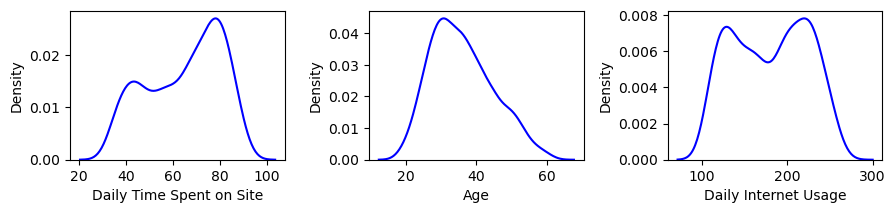

In [12]:
feat = num
plt.figure(figsize=(15,8))
for i in range(0, len(feat)):
  plt.subplot(4, 5, i+1)
  sns.kdeplot(x = df1[feat[i]], color = 'blue')
  plt.xlabel(feat[i])
  plt.tight_layout()

plt.show() 

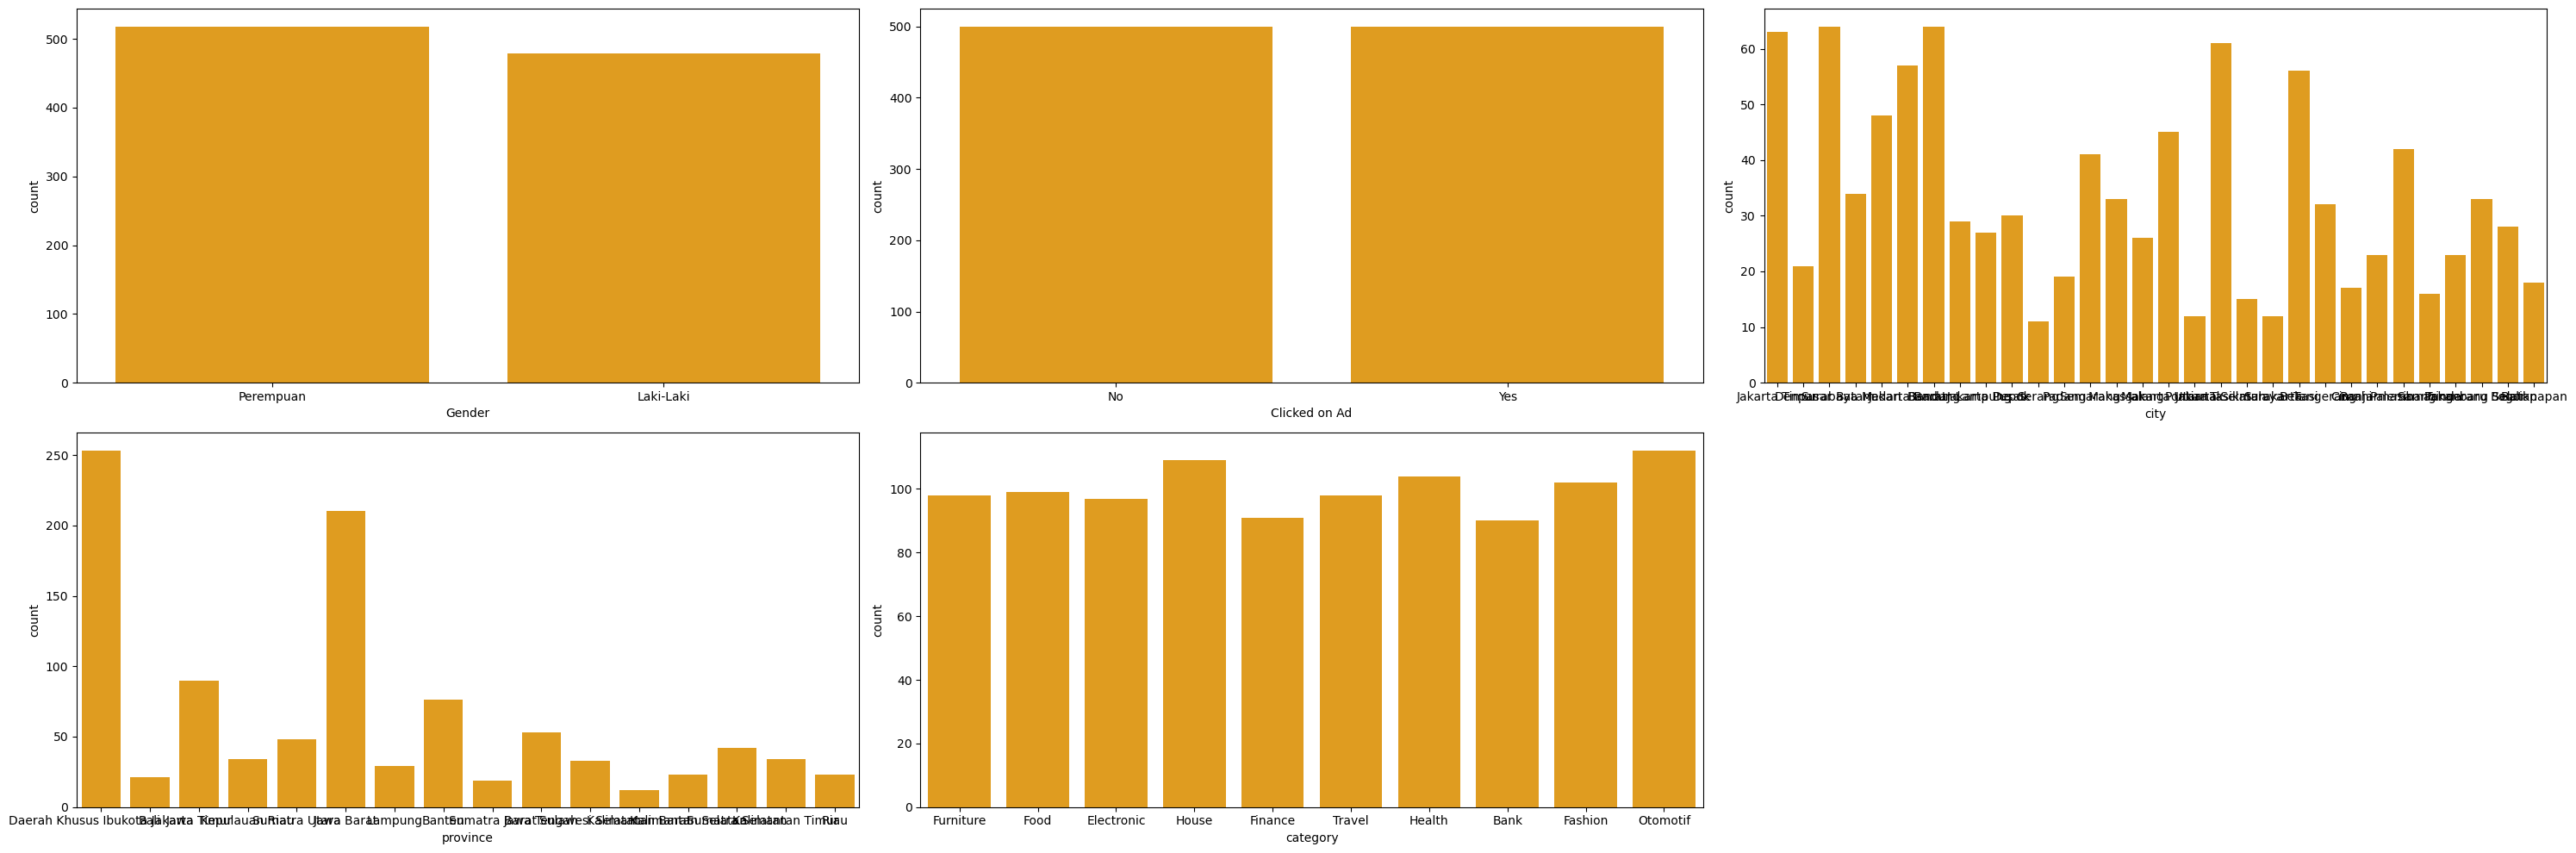

In [13]:
feat = cat  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(30,10))
for i in range(0, len(feat)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df1[feat[i]], color='orange')
  plt.tight_layout()

## 1.2 Bivariate Analysis

**Clicked on Ad Based** on `Age`, `Daily Time Spent on Site`, and `Daily Internet Usage`

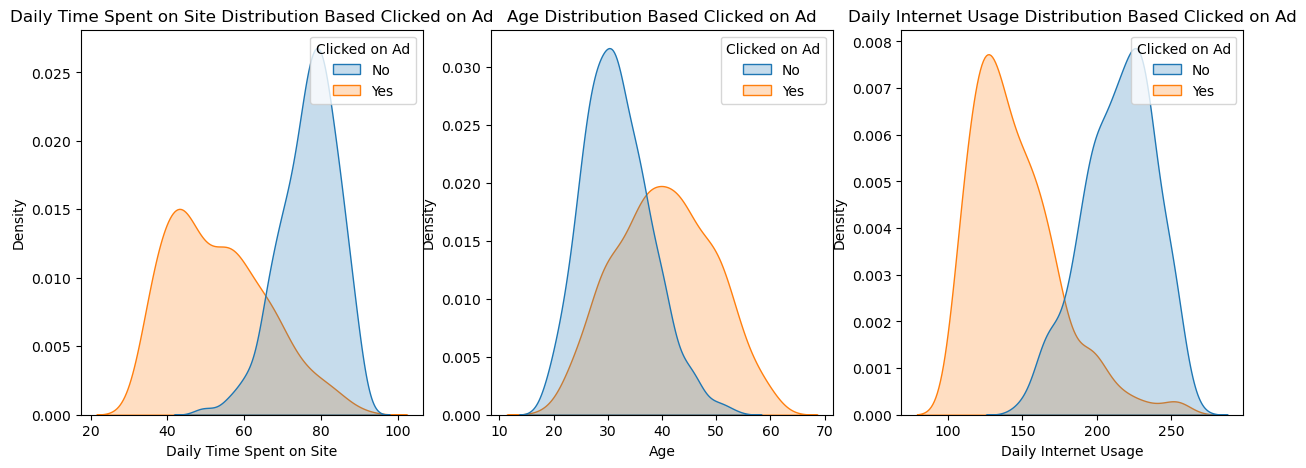

In [88]:
plt.figure(figsize=(15,5))
for i in range(0,len(num)):
    plt.subplot(1,3,i+1)
    sns.kdeplot(df1, x=df1[num[i]], hue=df1['Clicked on Ad'],fill=True).set(title=f'{num[i]} Distribution Based Clicked on Ad')

Pada *bivariate analysis* terdapat 3 grafik yaitu `Daily Time Spent on Site Distribution Based Clicked on Ad`, `Age Distribution Based Clicked on Ad`, dan `Daily Internet Usage Distribution Based Clicked on Ad`. Dari ketiga grafik tersebut masing-masing menunjukkan distribusi antara user yang melakukan **klik pada iklan** dan yang **tidak melakukan klik pada iklan**.

1. **Daily Internet Usage Distribution Based Clicked on Ad** :
Pada grafik hubungan ini, pengguna yang menghabiskan sedikit waktu (< 60 menit) untuk mengunjungi situs platform cenderung melakukan klik pada iklan sedangkan pengguna yang menghabiskan banyak waktu pada situs platform (> 60 menit) cukup banyak yang **tidak melakukan klik pada iklan**.

2. **Age Distribution Based Clicked on Ad** :
Pada grafik hubungan ini, pengguna yang berumur 20 hingga akhir 60 tahun cukup sering melakukan **klik pada iklan** namun tidak sebanyak pengguna yang berumur 15 hingga akhir 50 tahun yang **tidak melakukan klik pada iklan**.

3. **Daily Internet Usage Distribution Based Clicked on Ad** :
Pada grafik hubungan ini, kedua kategori cukup terpisah dengan baik. Pengguna dengan waktu penggunaan internet sedikit cenderung melakukan **klik pada iklan**, sedangkan untuk pengguna dengan waktu penggunaan internet yang cukup tinggi cenderung **tidak melakukan klik pada iklan**. 

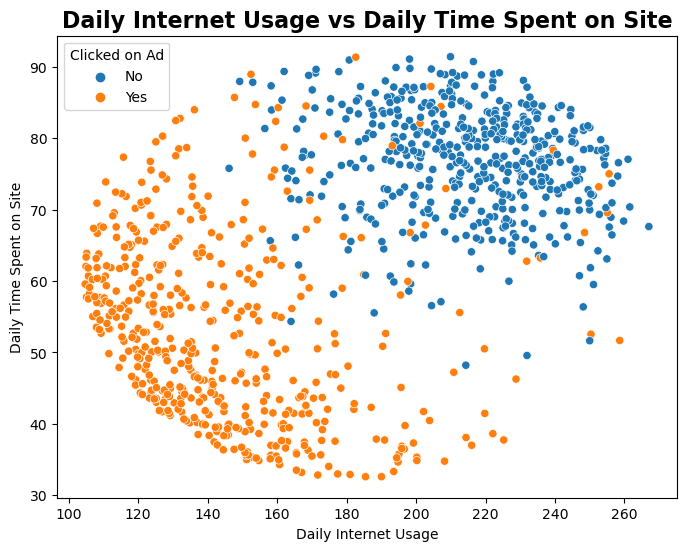

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df1['Daily Internet Usage'],y=df1['Daily Time Spent on Site'],hue=df1['Clicked on Ad'])
plt.title('Daily Internet Usage vs Daily Time Spent on Site',fontsize=16,fontweight='bold')
plt.show()

Setelah mengetahui adanya kemiripan antara penggunaan internet dan lamanya berkunjung pada sebuah website. Kita mencoba melihat hubungan 2 buah feature tersebut dengan targetnya. 

Ternyata berdasarkan plot tersebut kita bisa tahu bahwa penggunaan internet dan lamanya visit sebuah site dapat terbagi menjadi 2 buah segment yaitu active user dan non active user.

2 Segment tersebut dapat menjadi feature yang cukup erat dengan potensi seseorang click sebuah iklan atau tidak. Dapat dilihat pada visualisasi di atas ternyata, Active user cenderung tidak suka mengclick sebuah iklan dibandingkan non Active User.

Kesimpulannya, kita bisa optimalkan sistem advertisment kita terhadap user-user yang tidak aktif menggunakan internet.

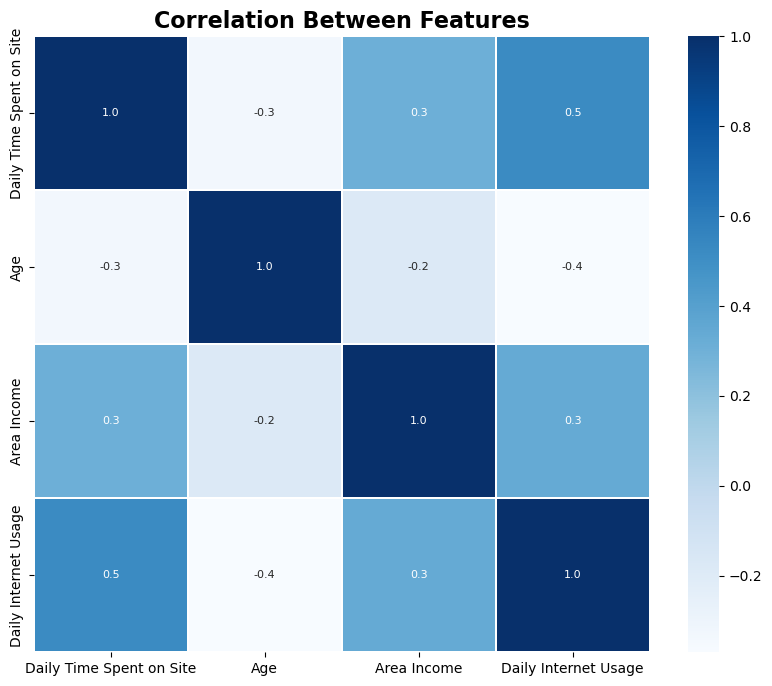

In [15]:
feats = df1[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
plt.figure(figsize=(10, 8))
corrmat = feats.corr()
plt.title('Correlation Between Features',fontsize=16,fontweight='bold')
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})
plt.show()

Pada visualisasi korelasi diatas, dapat dilihat bahwa hampir tidak ada korelasi yang tinggi antar tiap fiturnya kecuali korelasi antara `daily internet usage` dengan `daily time spent on site` sebesar **0.5**. 

# 2. Data Cleaning and Preprocessing

In [16]:
df5 = df1.copy()

## 2.1 Handle Missing Value

In [17]:
df5.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [18]:
fill = ['Daily Time Spent on Site','Area Income','Daily Internet Usage']
for col in fill:
    med = df5[col].median()  # Hitung nilai rata-rata kolom
    df5[col].fillna(med, inplace=True)

In [19]:
df5['Gender'] = df5['Gender'].fillna(df5['Gender'].mode()[0])

In [20]:
df5.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

Seluruh kolom dengan value *null* sudah diisi.

## 2.2 Handle Duplicated Rows

In [21]:
df5.duplicated().sum()

0

Tidak terdapat baris duplikat pada dataframe.

## 2.3 Feature Extraction

In [22]:
df5['Timestamp'] = pd.to_datetime(df5['Timestamp'])

In [23]:
df5['Weekday'] = df5['Timestamp'].dt.dayofweek

df5['Month'] = df5['Timestamp'].dt.month

df5['Hour'] = df5['Timestamp'].dt.hour

## 2.4 Feature Encoding

Label Encoding : `Gender` dan `Clicked on Ad` <br>
One Hot Encoding : `Provinsi` dan `Category`

In [24]:
for col in cat:
    print(f'value counts of column {col}')
    print(df5[col].value_counts())
    print('---'*10, '\n')

value counts of column Gender
Perempuan    521
Laki-Laki    479
Name: Gender, dtype: int64
------------------------------ 

value counts of column Clicked on Ad
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------ 

value counts of column city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Na

In [25]:
map_gen = {'Laki-Laki' : 0, 'Perempuan' : 1}
df5['Gender'] = df5['Gender'].map(map_gen)

In [26]:
map_coa = {'Yes' : 1, 'No' : 0}
df5['Clicked on Ad'] = df5['Clicked on Ad'].map(map_coa)

In [27]:
df5['province'].value_counts()

Daerah Khusus Ibukota Jakarta    253
Jawa Barat                       210
Jawa Timur                        90
Banten                            76
Jawa Tengah                       53
Sumatra Utara                     48
Sumatra Selatan                   42
Kepulauan Riau                    34
Kalimantan Timur                  34
Sulawesi Selatan                  33
Lampung                           29
Kalimantan Selatan                23
Riau                              23
Bali                              21
Sumatra Barat                     19
Kalimantan Barat                  12
Name: province, dtype: int64

In [28]:
df5['Pulau'] = np.where(((df5['province'] == 'Daerah Khusus Ibukota Jakarta') |
                         (df5['province'] == 'Jawa Barat') |
                         (df5['province'] == 'Jawa Tengah') |
                         (df5['province'] == 'Jawa Timur') |
                         (df5['province'] == 'Banten')), 'Jawa',
                        np.where(((df5['province'] == 'Riau') |
                                  (df5['province'] == 'Sumatra Utara') |
                                  (df5['province'] == 'Sumatra Barat') |
                                  (df5['province'] == 'Lampung') |
                                  (df5['province'] == 'Sumatra Selatan')), 'Sumatra',
                                 np.where(((df5['province'] == 'Kepulauan Riau') |
                                           (df5['province'] == 'Kalimantan Timur') |
                                           (df5['province'] == 'Kalimantan Selatan') |
                                           (df5['province'] == 'Kalimantan Barat')), 'Kalimantan',
                                          np.where(((df5['province'] == 'Bali')), 'Bali', 'Sulawesi')
                                         )
                                )
                       )


In [29]:
df5['Pulau'].value_counts()

Jawa          682
Sumatra       161
Kalimantan    103
Sulawesi       33
Bali           21
Name: Pulau, dtype: int64

In [30]:
df5 = pd.get_dummies(df5, columns=['Pulau'])

In [31]:
df5 = pd.get_dummies(df5, columns=['category'])

In [32]:
df5.drop('Unnamed: 0',axis=1,inplace=True)

## 2.4 Feature Selection

In [33]:
df5.drop(['Timestamp','city','province'],axis=1,inplace=True)

In [34]:
coa = df5.pop('Clicked on Ad')
df5['Clicked on Ad'] = coa

In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Gender                    1000 non-null   int64  
 5   Weekday                   1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Hour                      1000 non-null   int64  
 8   Pulau_Bali                1000 non-null   uint8  
 9   Pulau_Jawa                1000 non-null   uint8  
 10  Pulau_Kalimantan          1000 non-null   uint8  
 11  Pulau_Sulawesi            1000 non-null   uint8  
 12  Pulau_Sumatra             1000 non-null   uint8  
 13  category_Bank             1000 non-null   uint8  
 14  category_

# 3. Modelling (Classification)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [36]:
dfmod = df5.copy()

### Train Test Split

In [37]:
x = dfmod.drop(columns='Clicked on Ad').copy()
y = dfmod['Clicked on Ad'].copy()

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [39]:
print(x_train.shape)
print(x_test.shape)

(700, 23)
(300, 23)


In [100]:
# Membuat function model machine learning
def experiment(x_train,x_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dt = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dt),
                  ('Random Forest',rfc),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        model.fit(x_train,y_train)
        
        
        y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        
        
    return result

## Experiment 1 (Without Normalization)

In [101]:
result = experiment(x_train,x_test,y_train,y_test)
result1 = pd.DataFrame(result)

In [102]:
result1

,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.620000,0.595588,0.578571
1,Logistic Regression,LogisticRegression(),0.546667,0.000000,0.000000
2,Decision Tree,DecisionTreeClassifier(),0.906667,0.955882,0.855263
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.946667,0.948529,0.934783
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.946667,0.955882,0.928571


Berikut adalah hasil modeling dengan menggunakan data default (preprocessing sederhana). 

Hasil dari modeling tersebut dapat dilihat bahwa **Random Forest Classifier** memiliki akurasi terbesar. 

Adapun metode lain yang cukup tinggi akurasinya adalah **Gradient Boosting**.

Untuk beberapa model seperti logistic regression dan k-nearest neighbor akurasi yang dihasilkan tidak begitu bagus.

## Experiment 2 (With Normalization)

In [103]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
x_train_nor = minmax_scaler.fit_transform(x_train)
x_test_nor = minmax_scaler.transform(x_test)

In [104]:
result2 = experiment(x_train_nor,x_test_nor,y_train,y_test)
result2 = pd.DataFrame(result2)

In [105]:
result2

,model_name,model,accuracy,recall,precision
0,K-Nearest Neighbor,KNeighborsClassifier(),0.876667,0.897059,0.841379
1,Logistic Regression,LogisticRegression(),0.966667,0.955882,0.970149
2,Decision Tree,DecisionTreeClassifier(),0.916667,0.955882,0.872483
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.963333,0.970588,0.949640
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.946667,0.955882,0.928571


Setelah menerapkan min max scaler kita memperoleh peningkatan signifikan pada beberapa model, terutama untuk model k-nearest neighbor dan logistic regression. Bahkan **logistic regression** menjadi model pertama yang paling tinggi akurasinya lalu disusul oleh **random forest**.

Berdasarkan metode tersebut kita akan pilih `random forest` sebagai model terbaik karena memiliki akurasi yang paling tinggi. Logistic Regression juga bisa menjadi pilihan yang baik jika ada kendala tentang komputasi.

## 3.1 Model Evaluation

In [106]:
final_model = result2['model'][3]
y_pred = final_model.predict(x_test_nor)

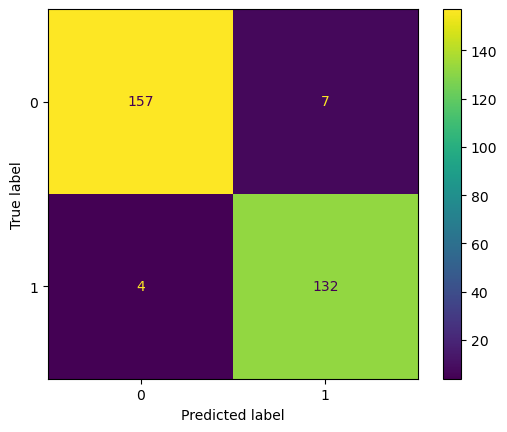

In [107]:
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)

disp.plot()
plt.show()

Berdasarkan model random forest kita ingin melihat bagaimana performa model kita secara mendetail. Untuk itu kita akan menggunakan confusion matrix.

Confusion matrix yang dihasilkan random forest sangatlah baik. Kita dapat melihat kesalahan prediksi (**cell ungu**) berjumlah sangat sedikit (**bagian kanan atas dan kiri bawah**).

Dengan hasil berikut maka kita akan mendapatkan akurasi, precision, dan recall yang bagus.

## 3.2 Feature Importance

In [108]:
feature_imp = {}

feature_imp['columns'] = x_train.columns
feature_imp['feature_imp'] = result2['model'][3].feature_importances_

In [113]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(10)

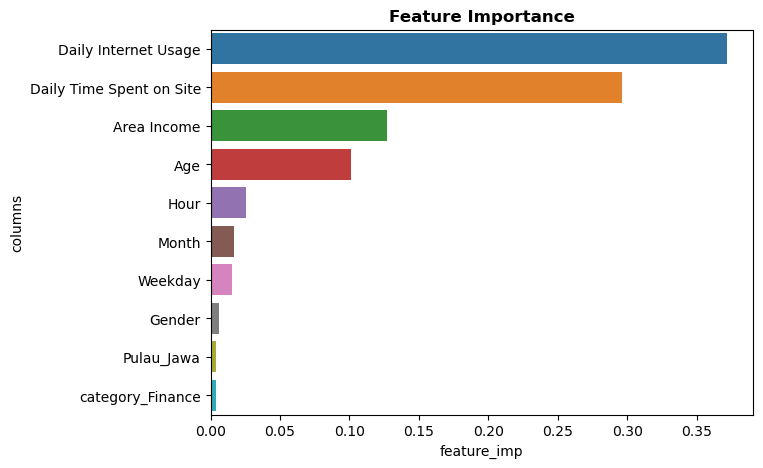

In [119]:
plt.figure(figsize=(7,5))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])
plt.title('Feature Importance',fontsize=12,fontweight='bold')
plt.show()

Dengan menggunakan model random forest kita mampu melihat feature yang paling penting dalam membangun model. Dalam hal ini, ditetapkan *threshold* untuk feature importance yaitu sebesar **0.10**, sehingga score importance **> 0.10** dianggap sebagai feature yang berpengaruh.

Berdasarkan metode random forest kita dapat melihat bahwa **daily internet usage** merupakan feature yang sangat penting dalam penentuan apakah user akan click atau tidak. Adapun feature penting lain adalah **daily time spent on site, income area, dan usia**.

Jika di combine insight yang kita peroleh dari proses EDA kita menjadi tahu bahwa ternyata penggunaan internet harian jika semakin tinggi maka peluang user akan click semakin kecil.



# 4. Recommendations

## Feature Based

Berdasarkan EDA dan feature importance yang sudah dibuat dapat diberikan rekomendasi yaitu terdapat 3 fitur penting dalam memprediksi apakah customer akan melakukan klik pada iklan atau tidak. 3 Features importance tersebut antara lain :

1. **Daily Internet Usage**<br>
Berdasarkan feature importance yang tinggi, fokuskan strategi pemasaran pada pengguna yang memiliki tingkat penggunaan internet harian tinggi. Hal ini dapat dilakukan dengan menyediakan konten iklan yang menarik dan relevan bagi pengguna yang aktif menggunakan internet setiap hari.

2. **Daily Time Spent on Site**<br>
Fitur ini menunjukkan berapa lama pengguna menghabiskan waktu di situs web. Anda dapat memanfaatkan informasi ini dengan menyajikan iklan yang lebih menarik bagi pengguna yang menghabiskan waktu lebih lama di situs web Anda. Misalnya, dengan menampilkan iklan yang lebih interaktif atau menawarkan diskon khusus bagi pengguna yang aktif di situs Anda.

3. **Area Income**<br>
Fitur ini menunjukkan tingkat pendapatan daerah tempat pengguna berada. Anda dapat mengadaptasi strategi pemasaran berdasarkan tingkat pendapatan ini. Misalnya, dengan menawarkan produk atau layanan yang sesuai dengan tingkat pendapatan mereka, atau dengan menyesuaikan harga atau penawaran khusus sesuai dengan tingkat pendapatan daerah.

4. **Age**<br>
Usia pelanggan juga bisa menjadi faktor penting dalam menentukan kecenderungan mereka untuk mengklik iklan tertentu. Dalam kasus ini, Kalangan orang tua menjadi market yang potensial untuk market digital.

`Business takeaway :`
1. Kita bisa menggunakan cara yang lebih unik (soft selling) agar tidak begitu kelihatan beriklan oleh users.
2. Gunakan konten yang mainstream (sederhana tapi menjadi topic pembicaraan) agar bisa menggaet user dengan segment kelas bawah.

## Model Based - Simulation
Dengan menggunakan model ML yang telah dibuat kita dapat membuat simulasi sebagai berikut:

Dengan asumsi:

* untuk beriklan terhadap seorang user bisa menggunakan budget **10rb rupiah**
* menggunakan data test sebagai alat simulasi sekitar 300 user dengan jumlah user pada masing-masing class sebanyak 164 dan 136 user.
* Setiap user yang convert kita akan mendapatkan keuntungan sebesar **12rb rupiah**


In [117]:
# Dimensi data
x_test.shape

(300, 23)

In [118]:
# Jumlah kelas pada setiap data
num_class = pd.Series(y_test).value_counts()
num_class

0    164
1    136
Name: Clicked on Ad, dtype: int64

Simulasi:

1. **Tanpa Machine Learning Model**
    * Kita akan menggunakan budget sekitar 300 * 10rb = 3jt rupiah untuk melakukan advertisement
    * **Cost = 3jt**
    * Sedangkan conversion rate yang akan kita dapatkan sebanyak 50%
    * Karena hanya ada 136 yang convert maka kita akan mendapatkan 136 * 12rb = 1.63jt
    * **Revenue = 1.63jt**
    * **Profit = 1.63-3 = -1.37jt**
    * Berdasarkan simulasi di atas jika kita tidak menggunakan machine learning model dan maka kita akan mendapatkan **potential loss sebesar 1.37jt rupiah**

2. **Dengan Menggunakan ML Model**
    * Kita akan melakukan advertisement hanya pada user yang berpotensi clicked (yang kita prediksi 1)
    * Kita akan menggunakan budget sekitar 139 * 10rb = 1.39jt rupiah untuk melakukan advertisement
    * **Cost = 1.39jt**
    * Sedangkan conversion rate yang akan kita dapatkan sebanyak 132/139 = 94.96%
    * Dari 139 yang kita prediksi akan ada 132 user yang convert
    * Maka kita akan mendapatkan 132 * 12rb = 1.58jt
    * **Revenue = 1.58jt**
    * **Profit = 1.58-1.39 = 190rb**
    * Berdasarkan simulasi di atas jika kita tidak menggunakan machine learning model dan maka kita akan mendapatkan **potential revenue sebesar 190rb rupiah**

3. **Kesimpulannya**, ML dapat bekerja dengan baik bahkan bisa mengantisipasi potential loss menjadi potential revenue